In [1]:
import os
import numpy as np
import pandas as pd
import pickle
import datetime
import statsmodels.api as sm
from scipy import stats


import time
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns; sns.set()

import sys
from PIL import Image # for logos
import io
from itertools import product
import warnings

from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes
from mpl_toolkits.axes_grid1.inset_locator import mark_inset

from plotly import tools
import plotly.offline as py
import plotly.graph_objs as go
import plotly.figure_factory as ff
py.init_notebook_mode(connected=True)

In [2]:
data = pd.read_csv('final_coins.csv')

In [3]:
data.set_index('date', inplace = True)

In [4]:
data.index = pd.to_datetime(data.index)

In [5]:
# split dataset to 4 datasets by year (2015,2016,2017,2018)
combined_df2018 = data[data.index.year == 2018]
combined_df2017 = data[data.index.year == 2017]
combined_df2016 = data[data.index.year == 2016]
combined_df2015 = data[data.index.year == 2015]

In [6]:
# Calculate the pearson correlation coefficients for cryptocurrencies in 2015
combined_df2015.pct_change().corr(method='spearman')

,BTC,LTC,DASH,XLM,XMR,XRP
BTC,1.000000,0.698958,0.147777,0.367379,0.468911,0.288745
LTC,0.698958,1.000000,0.114683,0.274285,0.300039,0.283552
DASH,0.147777,0.114683,1.000000,0.029342,0.022788,0.032225
XLM,0.367379,0.274285,0.029342,1.000000,0.193267,0.308994
XMR,0.468911,0.300039,0.022788,0.193267,1.000000,0.115849
XRP,0.288745,0.283552,0.032225,0.308994,0.115849,1.000000


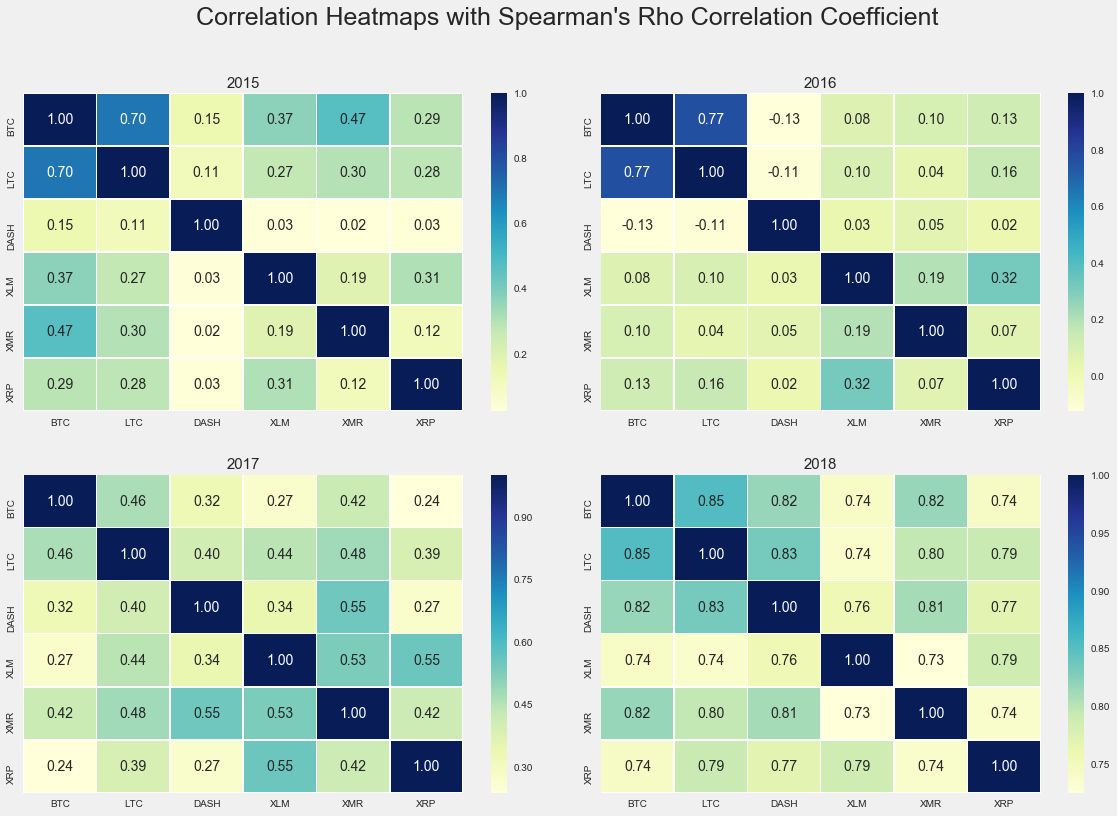

In [7]:
plt.style.use('fivethirtyeight')
plt.style.use('seaborn-notebook')

f,ax = plt.subplots(2, 2,figsize=(18, 12))

plt.suptitle('Correlation Heatmaps with Spearman\'s Rho Correlation Coefficient', fontsize = 25)
#plt.tight_layout(wspace=0.0)
plt.subplots_adjust(hspace=0.2, wspace=0.05)

sns.heatmap(combined_df2015.pct_change().corr(method='spearman'), annot=True, linewidths=.5, fmt= '.2f',ax=ax[0,0],cmap="YlGnBu")

sns.heatmap(combined_df2016.pct_change().corr(method='spearman'), annot=True, linewidths=.5, fmt= '.2f',ax=ax[0,1],cmap="YlGnBu")

sns.heatmap(combined_df2017.pct_change().corr(method='spearman'), annot=True, linewidths=.5, fmt= '.2f',ax=ax[1,0],cmap="YlGnBu")

sns.heatmap(combined_df2018.pct_change().corr(method='spearman'), annot=True, linewidths=.5, fmt= '.2f',ax=ax[1,1],cmap="YlGnBu")

ax[0,0].set_title('2015', fontsize = 15)
ax[0,1].set_title('2016', fontsize = 15)
ax[1,0].set_title('2017', fontsize = 15)
ax[1,1].set_title('2018', fontsize = 15)

plt.show()

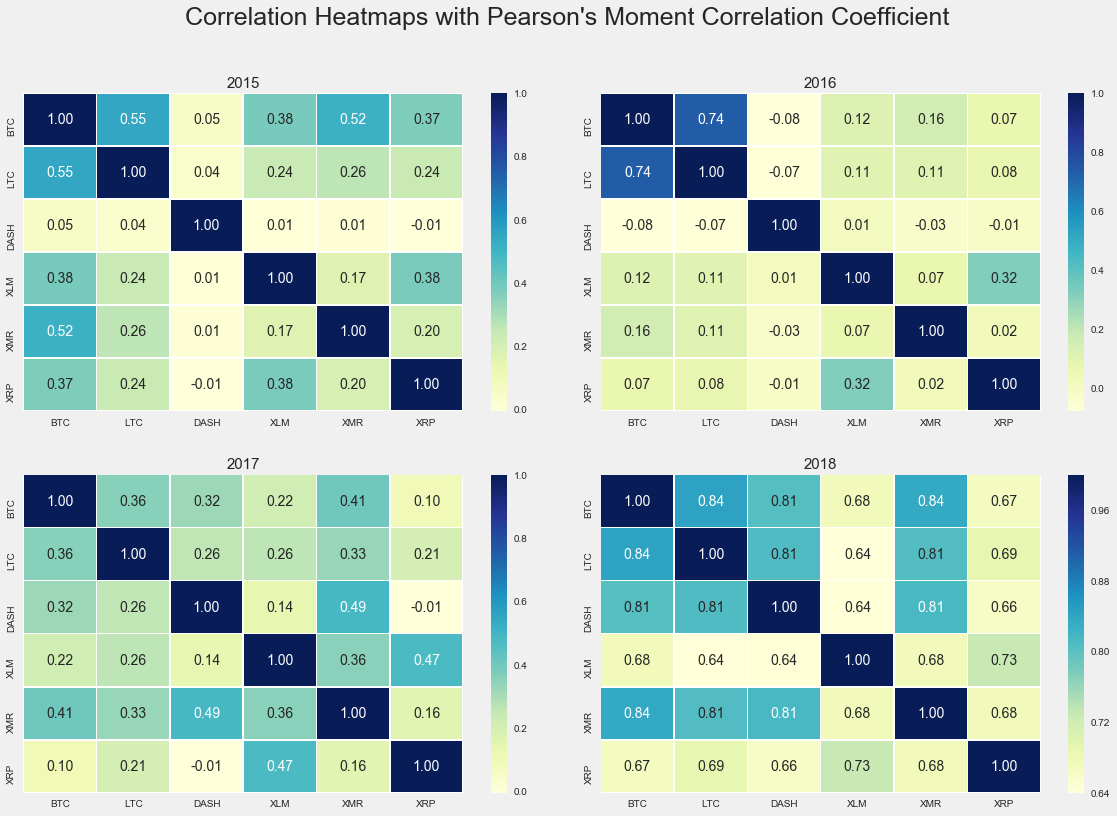

In [8]:
plt.style.use('fivethirtyeight')
plt.style.use('seaborn-notebook')

f,ax = plt.subplots(2, 2,figsize=(18, 12))

plt.suptitle('Correlation Heatmaps with Pearson\'s Moment Correlation Coefficient', fontsize = 25)
#plt.tight_layout(wspace=0.0)
plt.subplots_adjust(hspace=0.2, wspace=0.05)

sns.heatmap(combined_df2015.pct_change().corr(method='pearson'), annot=True, linewidths=.5, fmt= '.2f',ax=ax[0,0],cmap="YlGnBu")

sns.heatmap(combined_df2016.pct_change().corr(method='pearson'), annot=True, linewidths=.5, fmt= '.2f',ax=ax[0,1],cmap="YlGnBu")

sns.heatmap(combined_df2017.pct_change().corr(method='pearson'), annot=True, linewidths=.5, fmt= '.2f',ax=ax[1,0],cmap="YlGnBu")

sns.heatmap(combined_df2018.pct_change().corr(method='pearson'), annot=True, linewidths=.5, fmt= '.2f',ax=ax[1,1],cmap="YlGnBu")

ax[0,0].set_title('2015', fontsize = 15)
ax[0,1].set_title('2016', fontsize = 15)
ax[1,0].set_title('2017', fontsize = 15)
ax[1,1].set_title('2018', fontsize = 15)

plt.show()